In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker

In [2]:
iso_sim = pd.read_csv('bigo.csv')
iso_sim

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1863,1200,9536447801,51,53,13222.238820
1864,1200,20637893939,54,57,32296.450608
1865,1200,7328652191,42,58,8641.958949
1866,1200,100170830615,59,64,103111.924355


<Axes: title={'center': 'iso_count'}, xlabel='seq_len'>

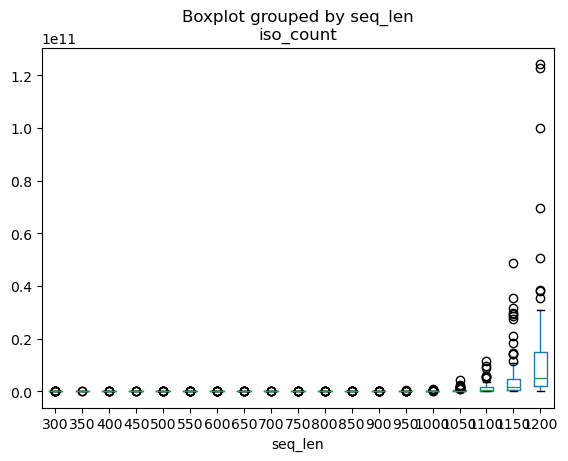

In [3]:
iso_sim.boxplot(by = 'seq_len', column = ['iso_count'], grid = False)

In [12]:
pwm20 = pd.read_csv('sg_rnaseq_pwm_20bp.csv', header=None)
pwm20.head(10)

,0,1,2,3,4
0,smallgenes_rnaseq_relative_donpwm,0.032819,0.014615,0.014838,0.026514
1,smallgenes_rnaseq_relative_donpwm,0.019318,0.009823,0.010735,0.013278
2,smallgenes_rnaseq_relative_donpwm,0.038890,0.024539,0.018565,0.014966
3,smallgenes_rnaseq_relative_donpwm,0.143828,0.038324,0.031651,0.060549
4,smallgenes_rnaseq_relative_donpwm,0.069109,0.033438,0.244270,0.063508
5,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,2.000000,0.000000
6,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,0.000000,2.000000
7,smallgenes_rnaseq_relative_donpwm,0.364980,0.008178,0.122333,0.095131
8,smallgenes_rnaseq_relative_donpwm,0.517074,0.041288,0.053633,0.111615
9,smallgenes_rnaseq_relative_donpwm,0.075285,0.026691,0.704060,0.103733


In [13]:
pwm20_don = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_donpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_don.head(5)

,A,C,G,T
0,0.032819,0.014615,0.014838,0.026514
1,0.019318,0.009823,0.010735,0.013278
2,0.038890,0.024539,0.018565,0.014966
3,0.143828,0.038324,0.031651,0.060549
4,0.069109,0.033438,0.244270,0.063508


In [14]:
pwm20_acc = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_accpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_acc.head(5)

,A,C,G,T
20,0.142444,0.043767,0.019292,0.100835
21,0.080952,0.033386,0.019210,0.086678
22,0.077257,0.032734,0.021609,0.100955
23,0.064045,0.027519,0.020824,0.077475
24,0.073747,0.031291,0.020163,0.086534


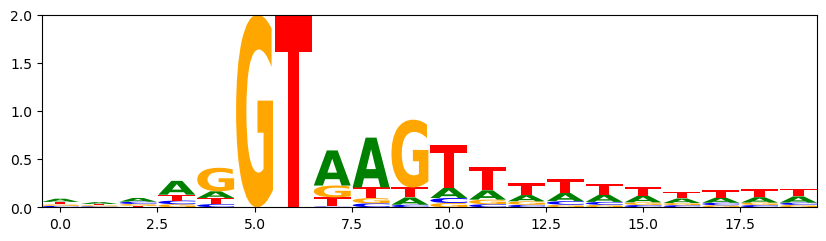

In [16]:
pwm20_don_plt = logomaker.Logo(pwm20_don, shade_below=.5, fade_below=.5)

This pwm suggests the donor site should include 2 base pairs upstream, into the exon sequence. The main donor site should also be 7 base pairs long. Suggested donor site motif would be AGGTAAGTT.

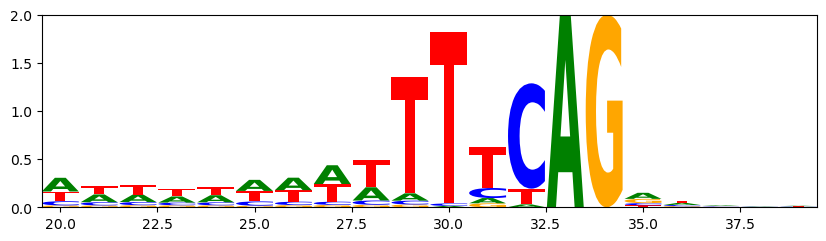

In [15]:
pwm20_acc_plt = logomaker.Logo(pwm20_acc, shade_below=.5, fade_below=.5)

This pwm suggests the acceptor site should be 8 base pairs long, with a top scoring motif being ATTTTCAG.